In [1]:
import requests
from bs4 import BeautifulSoup
import lxml
url = "https://www.funda.nl/koop/rotterdam/p3"

headers = {
    "authority": "www.funda.nl",
    "accept": "*/*",
    "accept-language": "en-US,en;q=0.9,nl;q=0.8,it;q=0.7",
    "content-type": "application/x-www-form-urlencoded; charset=UTF-8",
    "origin": "https://www.funda.nl",
    "referer": "https://www.funda.nl/koop/rotterdam/",
    "sec-ch-ua": "'Chromium';v='106', 'Google Chrome';v='106', 'Not;A=Brand';v='99'",
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": "Windows",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36",
    "x-requested-with": "XMLHttpRequest"
}

response = requests.request("GET", url, headers=headers)



In [2]:
url = "https://www.funda.nl/koop/rotterdam/p{}"

In [20]:
def get_html_synch(url):
    response = requests.request("GET", url, headers=headers)
    print(url)
    return response.text

In [30]:
def prices_from_html_synch(html):
    soup = BeautifulSoup(html, 'lxml')
    return [res.text for res in soup.find_all("span", class_="search-result-price")]

In [5]:
import asyncio

In [6]:
async def get_html(url):
    return await asyncio.to_thread(get_html_synch, url)

In [31]:
async def prices_from_html(html):
    return await asyncio.to_thread(prices_from_html_synch, html)

In [33]:
async def get_prices_from_url(url, max_pp):
    htmls = await asyncio.gather(*(get_html(url.format(i)) for i in range(1, max_pp + 1)))
    prices = await asyncio.gather(*(prices_from_html(html) for html in htmls))
    return prices

In [19]:
async def main_html(max_pp):
    return await asyncio.gather(*(get_html(url.format(i)) for i in range(1, max_pp + 1)))

In [41]:
from pipe import traverse, select, sort, where
from matplotlib import pyplot as plt

In [11]:
import re
# print(re.findall('\d+', 'xyz123abc456def789'))
soup = BeautifulSoup(response.text)
pp=soup.find("div",class_="pagination-pages")


In [12]:
max_num_pages = list(pp 
                     | select(lambda x: re.findall('\d+', x.text))
                     | traverse 
                     | select(lambda x: int(x)) 
                     | sort(reverse=True)
                    )[0]
print(max_num_pages)

155


In [13]:
results = await main(max_num_pages)

https://www.funda.nl/koop/rotterdam/p1
https://www.funda.nl/koop/rotterdam/p11
https://www.funda.nl/koop/rotterdam/p7
https://www.funda.nl/koop/rotterdam/p9
https://www.funda.nl/koop/rotterdam/p10
https://www.funda.nl/koop/rotterdam/p18
https://www.funda.nl/koop/rotterdam/p3
https://www.funda.nl/koop/rotterdam/p2
https://www.funda.nl/koop/rotterdam/p17
https://www.funda.nl/koop/rotterdam/p6
https://www.funda.nl/koop/rotterdam/p13
https://www.funda.nl/koop/rotterdam/p4
https://www.funda.nl/koop/rotterdam/p15
https://www.funda.nl/koop/rotterdam/p5
https://www.funda.nl/koop/rotterdam/p19
https://www.funda.nl/koop/rotterdam/p16
https://www.funda.nl/koop/rotterdam/p21
https://www.funda.nl/koop/rotterdam/p8
https://www.funda.nl/koop/rotterdam/p12
https://www.funda.nl/koop/rotterdam/p14
https://www.funda.nl/koop/rotterdam/p26
https://www.funda.nl/koop/rotterdam/p24
https://www.funda.nl/koop/rotterdam/p23
https://www.funda.nl/koop/rotterdam/p20
https://www.funda.nl/koop/rotterdam/p25
https://w

In [14]:
[*(results | traverse)].__len__()

2011

In [34]:
prices = await get_prices_from_url(url, max_num_pages)

https://www.funda.nl/koop/rotterdam/p8
https://www.funda.nl/koop/rotterdam/p10
https://www.funda.nl/koop/rotterdam/p3
https://www.funda.nl/koop/rotterdam/p7
https://www.funda.nl/koop/rotterdam/p12
https://www.funda.nl/koop/rotterdam/p11
https://www.funda.nl/koop/rotterdam/p5
https://www.funda.nl/koop/rotterdam/p1
https://www.funda.nl/koop/rotterdam/p4
https://www.funda.nl/koop/rotterdam/p6https://www.funda.nl/koop/rotterdam/p2

https://www.funda.nl/koop/rotterdam/p9
https://www.funda.nl/koop/rotterdam/p20
https://www.funda.nl/koop/rotterdam/p17
https://www.funda.nl/koop/rotterdam/p19
https://www.funda.nl/koop/rotterdam/p13
https://www.funda.nl/koop/rotterdam/p16
https://www.funda.nl/koop/rotterdam/p14
https://www.funda.nl/koop/rotterdam/p18
https://www.funda.nl/koop/rotterdam/p21
https://www.funda.nl/koop/rotterdam/p24
https://www.funda.nl/koop/rotterdam/p23
https://www.funda.nl/koop/rotterdam/p22
https://www.funda.nl/koop/rotterdam/p26
https://www.funda.nl/koop/rotterdam/p25
https://w

In [44]:
prices = list(results 
              | traverse 
              | where(lambda x: "Prijs op aanvraag" not in x) 
              | select(lambda x: x.split(" ")[1].replace(".", "")) 
              | select(lambda x: float(x))
             )

(array([1.10373962e-07, 0.00000000e+00, 0.00000000e+00, 1.43486151e-07,
        1.53419807e-06, 1.49004849e-06, 2.37304019e-06, 2.35096539e-06,
        2.26266622e-06, 1.73287121e-06, 1.60042245e-06, 1.24722577e-06,
        1.21411358e-06, 9.71290867e-07, 1.04855264e-06, 3.75271471e-07,
        6.95355961e-07, 3.42159283e-07, 2.86972302e-07, 3.97346264e-07,
        1.54523547e-07, 1.32448755e-07, 8.82991697e-08, 1.10373962e-07,
        9.93365659e-08, 9.93365659e-08, 6.62243773e-08, 1.10373962e-07,
        6.62243773e-08, 7.72617735e-08, 1.43486151e-07, 2.20747924e-08,
        5.51869811e-08, 1.43486151e-07, 3.31121886e-08, 5.51869811e-08,
        2.20747924e-08, 8.82991697e-08, 1.10373962e-08, 2.20747924e-08,
        2.20747924e-08, 1.10373962e-08, 0.00000000e+00, 5.51869811e-08,
        2.20747924e-08, 0.00000000e+00, 0.00000000e+00, 1.10373962e-08,
        1.10373962e-08, 2.20747924e-08, 0.00000000e+00, 1.10373962e-08,
        1.10373962e-08, 1.10373962e-08, 0.00000000e+00, 2.207479

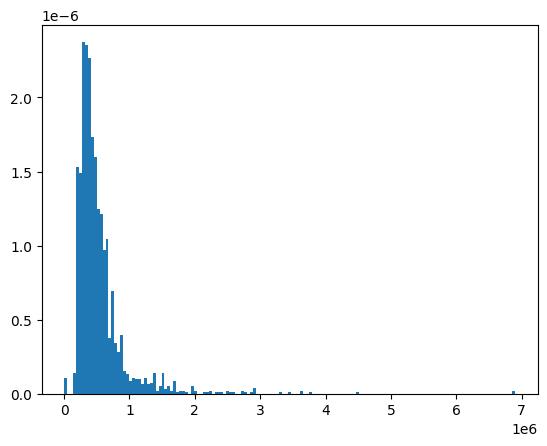

In [49]:
plt.hist(prices, density=True, bins='fd')

In [42]:
list(results 
              | traverse 
              | where(lambda x: "op" in x) 
              # | select(lambda x: float(x))
             )

['Prijs op aanvraag']

In [26]:
prices_from_html_synch(htmls[2])

['€ 625.000 k.k.',
 '€ 795.000 k.k.',
 '€ 365.000 k.k.',
 '€ 998.000 k.k.',
 '€ 398.000 k.k.',
 '€ 700.000 k.k.',
 '€ 498.000 k.k.',
 '€ 365.000 k.k.',
 '€ 375.000 k.k.',
 '€ 1.250.000 k.k.',
 '€ 350.000 k.k.',
 '€ 550.000 k.k.',
 '€ 625.000 k.k.',
 '€ 575.000 k.k.',
 '€ 595.000 k.k.']